**Amazon Stock Prediction**

 we predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.

trying to predict whether a trade is profitable or not

1 → Trade will be profitable (buy signal)

0 → Trade will not be profitable (no-buy or sell signal)

binary classification model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('done')
import warnings
warnings.filterwarnings('ignore')

done


In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AMZN_stock_data.csv')
print(df)

                           Date        Open        High         Low  \
0     1997-05-15 00:00:00-04:00    0.121875    0.125000    0.096354   
1     1997-05-16 00:00:00-04:00    0.098438    0.098958    0.085417   
2     1997-05-19 00:00:00-04:00    0.088021    0.088542    0.081250   
3     1997-05-20 00:00:00-04:00    0.086458    0.087500    0.081771   
4     1997-05-21 00:00:00-04:00    0.081771    0.082292    0.068750   
...                         ...         ...         ...         ...   
6982  2025-02-14 00:00:00-05:00  229.199997  229.889999  227.229996   
6983  2025-02-18 00:00:00-05:00  228.820007  229.300003  223.720001   
6984  2025-02-19 00:00:00-05:00  225.520004  226.830002  223.710007   
6985  2025-02-20 00:00:00-05:00  224.779999  225.130005  221.809998   
6986  2025-02-21 00:00:00-05:00  223.279999  223.309998  214.740005   

           Close      Volume  Dividends  Stock Splits  
0       0.097917  1443120000        0.0           0.0  
1       0.086458   294000000       

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)


In [7]:
# First, convert to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Now safely extract day, month, and year
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6987 non-null   datetime64[ns, UTC]
 1   Open          6987 non-null   float64            
 2   High          6987 non-null   float64            
 3   Low           6987 non-null   float64            
 4   Close         6987 non-null   float64            
 5   Volume        6987 non-null   int64              
 6   Dividends     6987 non-null   float64            
 7   Stock Splits  6987 non-null   float64            
 8   day           6987 non-null   int32              
 9   month         6987 non-null   int32              
 10  year          6987 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(6), int32(3), int64(1)
memory usage: 518.7 KB


In [9]:
df.sort_values('Date', inplace=True)

In [10]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
day             0
month           0
year            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year
Date,1.000000,0.819501,0.819569,0.819517,0.819604,-0.450959,NaN,0.010086,-0.000411,-0.002454,0.999360
Open,0.819501,1.000000,0.999924,0.999909,0.999813,-0.311761,NaN,0.014320,-0.000200,0.008689,0.818585
High,0.819569,0.999924,1.000000,0.999893,0.999914,-0.310848,NaN,0.014802,-0.000371,0.008367,0.818665
Low,0.819517,0.999909,0.999893,1.000000,0.999918,-0.312753,NaN,0.014342,-0.000237,0.008697,0.818600
Close,0.819604,0.999813,0.999914,0.999918,1.000000,-0.311783,NaN,0.014248,-0.000448,0.008384,0.818700
Volume,-0.450959,-0.311761,-0.310848,-0.312753,-0.311783,1.000000,NaN,0.016210,0.047489,-0.002920,-0.450669
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.010086,0.014320,0.014802,0.014342,0.014248,0.016210,NaN,1.000000,-0.018873,-0.004166,0.010285
day,-0.000411,-0.000200,-0.000371,-0.000237,-0.000448,0.047489,NaN,-0.018873,1.000000,-0.000021,-0.003392
month,-0.002454,0.008689,0.008367,0.008697,0.008384,-0.002920,NaN,-0.004166,-0.000021,1.000000,-0.038087


In [13]:
df['Dividends'].isna().sum()

0

In [14]:
df1=df.dropna()

In [15]:
df1['Dividends'].isna().all()


False

In [16]:
df1['Dividends'].nunique() #if 1, it means all the values are the same.


1

In [17]:
df1.corr()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year
Date,1.000000,0.819501,0.819569,0.819517,0.819604,-0.450959,NaN,0.010086,-0.000411,-0.002454,0.999360
Open,0.819501,1.000000,0.999924,0.999909,0.999813,-0.311761,NaN,0.014320,-0.000200,0.008689,0.818585
High,0.819569,0.999924,1.000000,0.999893,0.999914,-0.310848,NaN,0.014802,-0.000371,0.008367,0.818665
Low,0.819517,0.999909,0.999893,1.000000,0.999918,-0.312753,NaN,0.014342,-0.000237,0.008697,0.818600
Close,0.819604,0.999813,0.999914,0.999918,1.000000,-0.311783,NaN,0.014248,-0.000448,0.008384,0.818700
Volume,-0.450959,-0.311761,-0.310848,-0.312753,-0.311783,1.000000,NaN,0.016210,0.047489,-0.002920,-0.450669
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.010086,0.014320,0.014802,0.014342,0.014248,0.016210,NaN,1.000000,-0.018873,-0.004166,0.010285
day,-0.000411,-0.000200,-0.000371,-0.000237,-0.000448,0.047489,NaN,-0.018873,1.000000,-0.000021,-0.003392
month,-0.002454,0.008689,0.008367,0.008697,0.008384,-0.002920,NaN,-0.004166,-0.000021,1.000000,-0.038087


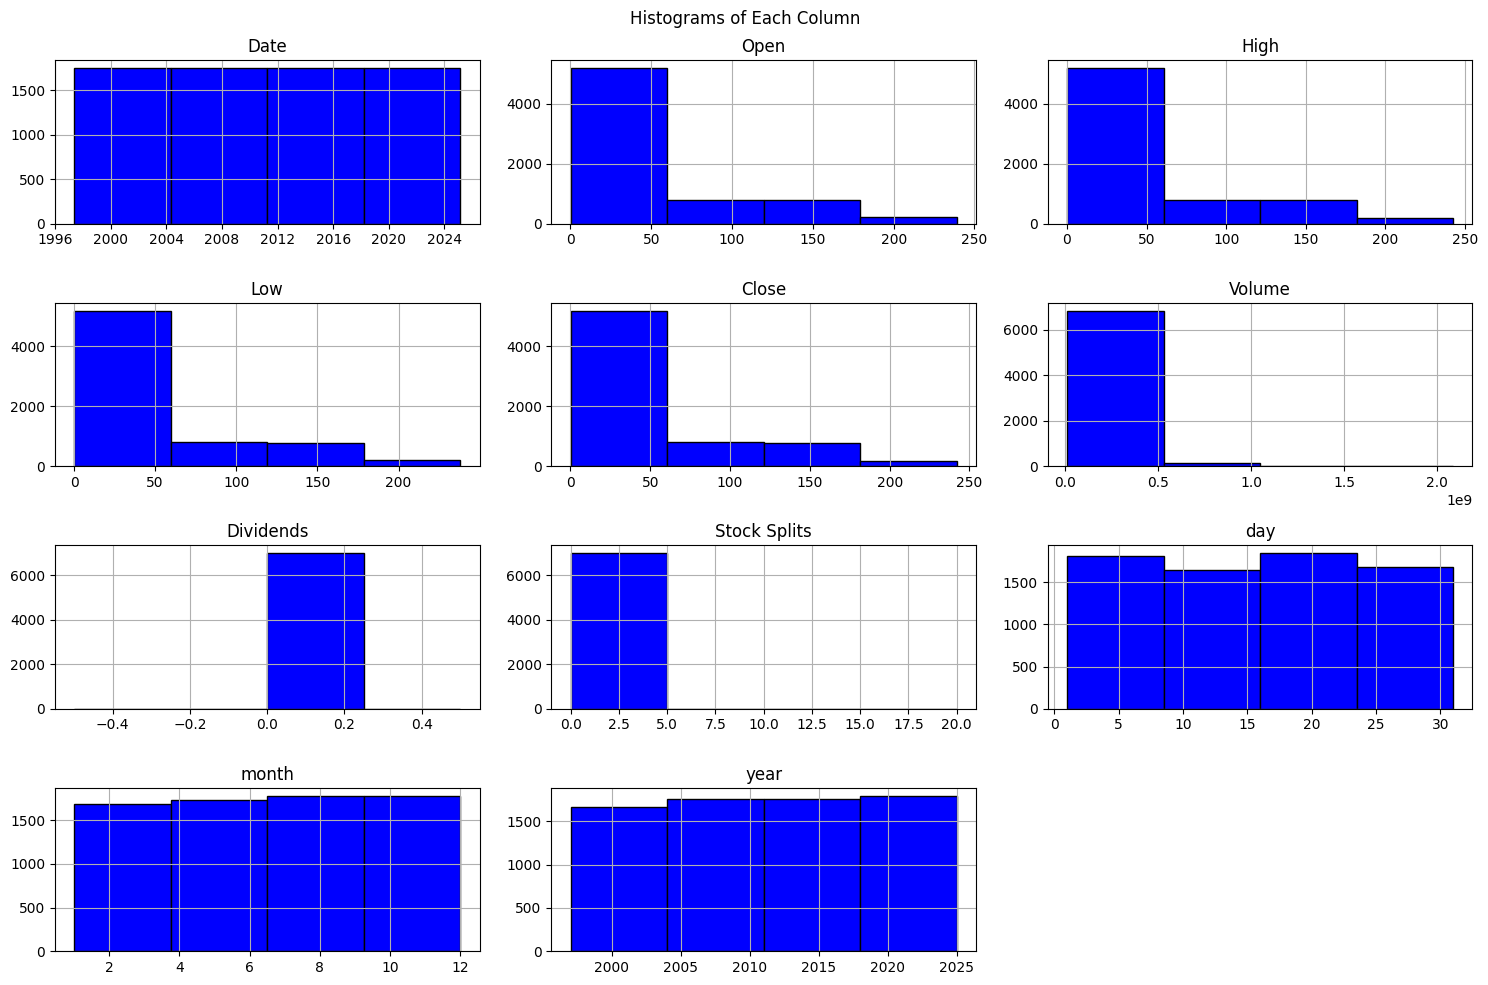

In [18]:
df1.hist(bins=4, color='blue', edgecolor='black', figsize=(15, 10))
plt.suptitle("Histograms of Each Column") 
plt.tight_layout()
plt.show()


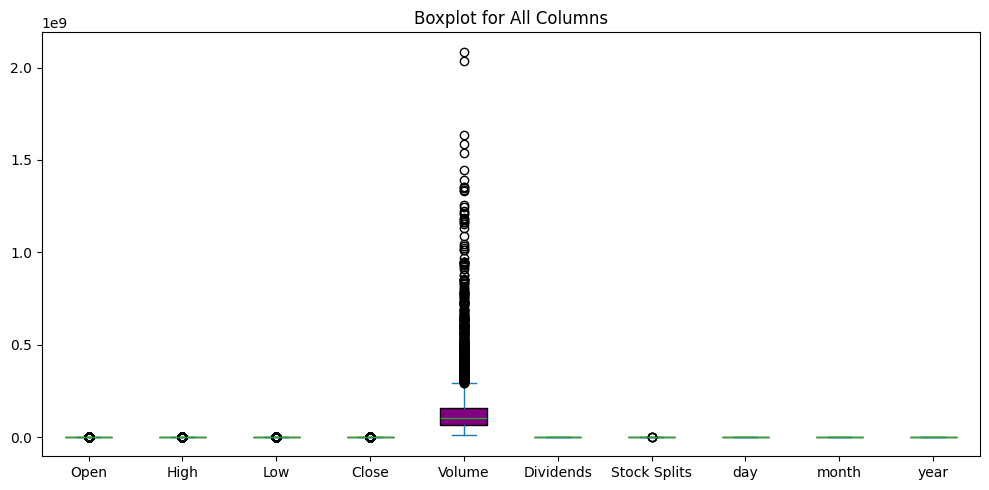

In [19]:
df1.plot(kind='box', figsize=(10, 5), patch_artist=True, boxprops=dict(facecolor='purple'))

plt.title("Boxplot for All Columns")
plt.tight_layout()
plt.show()

In [20]:
import numpy as np

# Add a small constant if there are zeros
df1['Volume_log'] = np.log1p(df1['Volume'])  # log(1 + x)


In [21]:
Q1 = df1['Volume_log'].quantile(0.25)
Q3 = df1['Volume_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1 = df1[(df1['Volume_log'] >= lower) & (df1['Volume_log'] <= upper)]


In [22]:
df1['Open_log'] = np.log1p(df1['Open'])
Q1 = df1['Open_log'].quantile(0.25)
Q3 = df1['Open_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1 = df1[(df1['Open_log'] >= lower) & (df1['Open_log'] <= upper)]


In [23]:
df1['High_log'] = np.log1p(df1['High'])
Q1 = df1['High_log'].quantile(0.25)
Q3 = df1['High_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1 = df1[(df1['High_log'] >= lower) & (df1['High_log'] <= upper)]

In [24]:
df1['Low_log'] = np.log1p(df1['Low'])
Q1 = df1['Low_log'].quantile(0.25)
Q3 = df1['Low_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1 = df1[(df1['Low_log'] >= lower) & (df1['Low_log'] <= upper)]

In [25]:
df1['Close_log'] = np.log1p(df1['Close'])
Q1 = df1['Close_log'].quantile(0.25)
Q3 = df1['Close_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1 = df1[(df1['Close_log'] >= lower) & (df1['Close_log'] <= upper)]

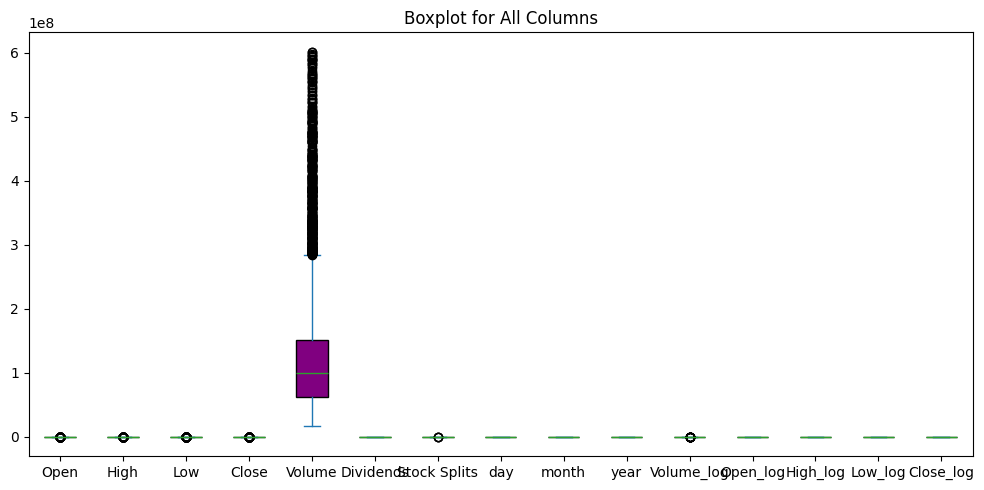

In [26]:
df1.plot(kind='box', figsize=(10, 5), patch_artist=True, boxprops=dict(facecolor='purple'))

plt.title("Boxplot for All Columns")
plt.tight_layout()
plt.show()

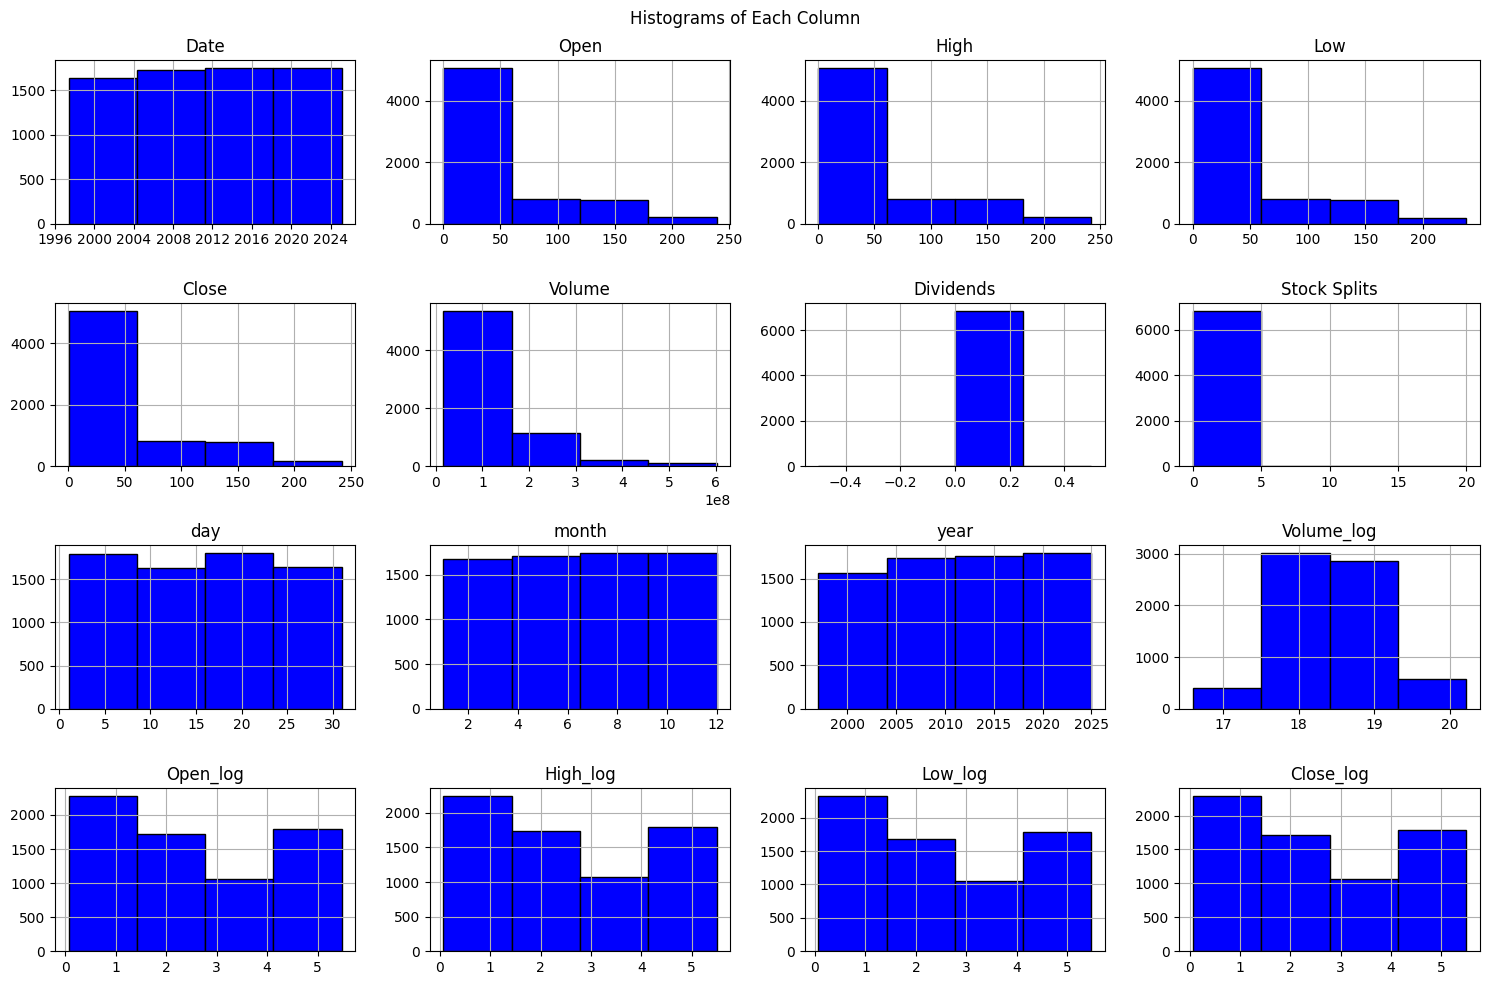

In [27]:
df1.hist(bins=4, color='blue', edgecolor='black', figsize=(15, 10))
plt.suptitle("Histograms of Each Column") 
plt.tight_layout()
plt.show()


In [28]:
df1

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year,Volume_log,Open_log,High_log,Low_log,Close_log
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,16,5,1997,19.499090,0.093889,0.094362,0.081964,0.082923
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,19,5,1997,18.620646,0.084360,0.084839,0.078118,0.081964
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,20,5,1997,18.510009,0.082923,0.083881,0.078600,0.078600
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,21,5,1997,19.747925,0.078600,0.079081,0.066490,0.068923
5,1997-05-22 04:00:00+00:00,0.071875,0.072396,0.065625,0.069792,235536000,0.0,0.0,22,5,1997,19.277374,0.069409,0.069895,0.063561,0.067464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,2025-02-14 05:00:00+00:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0,14,2,2025,17.112499,5.438948,5.441941,5.430354,5.436687
6983,2025-02-18 05:00:00+00:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0,18,2,2025,17.576131,5.437296,5.439383,5.414855,5.427809
6984,2025-02-19 05:00:00+00:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0,19,2,2025,17.167752,5.422833,5.428600,5.414811,5.427722
6985,2025-02-20 05:00:00+00:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0,20,2,2025,17.216765,5.419561,5.421110,5.406319,5.411110


In [29]:
df1.corr()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year,Volume_log,Open_log,High_log,Low_log,Close_log
Date,1.000000,0.821300,0.821384,0.821312,0.821417,-0.531420,NaN,0.012802,0.004969,0.002385,0.999348,-0.595241,0.962201,0.961884,0.962740,0.962397
Open,0.821300,1.000000,0.999923,0.999908,0.999811,-0.392255,NaN,0.015558,0.002653,0.009752,0.820478,-0.493231,0.884627,0.884710,0.884561,0.884562
High,0.821384,0.999923,1.000000,0.999892,0.999913,-0.391108,NaN,0.016033,0.002481,0.009435,0.820574,-0.491481,0.884636,0.884769,0.884588,0.884626
Low,0.821312,0.999908,0.999892,1.000000,0.999917,-0.393716,NaN,0.015581,0.002609,0.009742,0.820491,-0.495362,0.884573,0.884673,0.884567,0.884570
Close,0.821417,0.999811,0.999913,0.999917,1.000000,-0.392462,NaN,0.015473,0.002395,0.009434,0.820607,-0.493462,0.884607,0.884746,0.884604,0.884659
Volume,-0.531420,-0.392255,-0.391108,-0.393716,-0.392462,1.000000,NaN,0.005037,0.029720,-0.028485,-0.530192,0.917579,-0.473420,-0.470708,-0.475927,-0.473248
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.012802,0.015558,0.016033,0.015581,0.015473,0.005037,NaN,1.000000,-0.016999,-0.001284,0.012894,0.008923,0.014061,0.014222,0.014076,0.014060
day,0.004969,0.002653,0.002481,0.002609,0.002395,0.029720,NaN,-0.016999,1.000000,-0.002450,0.002046,0.017134,0.005019,0.005053,0.005093,0.005023
month,0.002385,0.009752,0.009435,0.009742,0.009434,-0.028485,NaN,-0.001284,-0.002450,1.000000,-0.033596,-0.049588,0.007011,0.006840,0.006986,0.006791


In [30]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'day', 'month', 'year', 'Volume_log', 'Open_log',
       'High_log', 'Low_log', 'Close_log'],
      dtype='object')

In [31]:
a=['Date','Volume_log','Open_log','High_log','Low_log','Close_log','day','month','year']
df2=df1[a]

In [32]:
df2.corr()

,Date,Volume_log,Open_log,High_log,Low_log,Close_log,day,month,year
Date,1.000000,-0.595241,0.962201,0.961884,0.962740,0.962397,0.004969,0.002385,0.999348
Volume_log,-0.595241,1.000000,-0.556664,-0.554141,-0.559145,-0.556573,0.017134,-0.049588,-0.593180
Open_log,0.962201,-0.556664,1.000000,0.999967,0.999965,0.999936,0.005019,0.007011,0.961404
High_log,0.961884,-0.554141,0.999967,1.000000,0.999946,0.999967,0.005053,0.006840,0.961094
Low_log,0.962740,-0.559145,0.999965,0.999946,1.000000,0.999967,0.005093,0.006986,0.961944
Close_log,0.962397,-0.556573,0.999936,0.999967,0.999967,1.000000,0.005023,0.006791,0.961609
day,0.004969,0.017134,0.005019,0.005053,0.005093,0.005023,1.000000,-0.002450,0.002046
month,0.002385,-0.049588,0.007011,0.006840,0.006986,0.006791,-0.002450,1.000000,-0.033596
year,0.999348,-0.593180,0.961404,0.961094,0.961944,0.961609,0.002046,-0.033596,1.000000


In [33]:
df2.describe()

,Volume_log,Open_log,High_log,Low_log,Close_log,day,month,year
count,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000
mean,18.426968,2.585522,2.598112,2.572295,2.585536,15.687144,6.556691,2010.949073
std,0.624057,1.618277,1.616973,1.619014,1.618102,8.743835,3.429620,7.942706
min,16.606430,0.067951,0.069895,0.063561,0.067464,1.000000,1.000000,1997.000000
25%,17.954244,1.145019,1.159237,1.135105,1.144860,8.000000,4.000000,2004.000000
50%,18.413432,2.331950,2.344207,2.320671,2.332047,16.000000,7.000000,2011.000000
75%,18.836241,4.356709,4.367541,4.335466,4.350549,23.000000,10.000000,2018.000000
max,20.215924,5.480722,5.495199,5.476589,5.493308,31.000000,12.000000,2025.000000


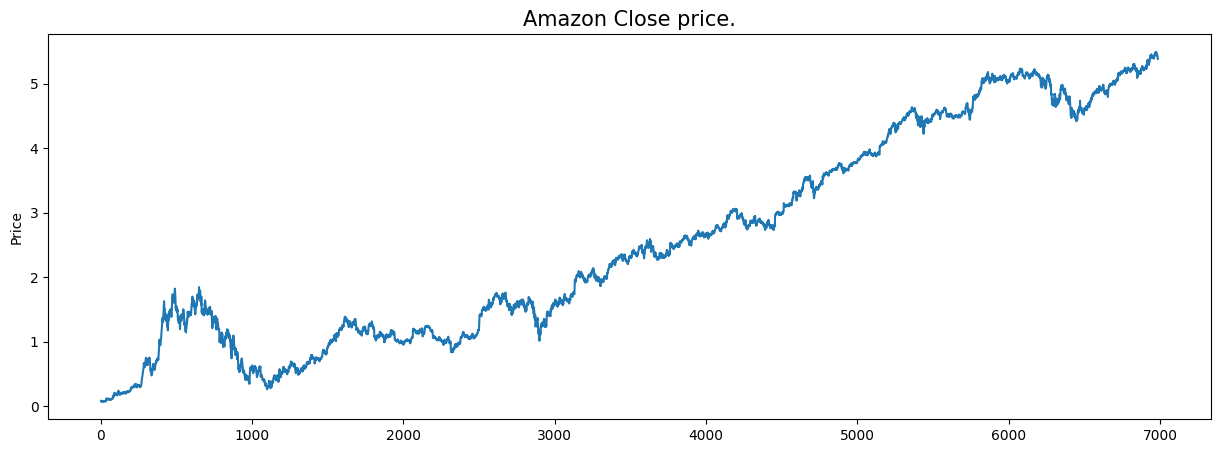

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df2['Close_log'])
plt.title('Amazon Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

In [35]:
!pip install xgboost


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6853 entries, 1 to 6986
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Date        6853 non-null   datetime64[ns, UTC]
 1   Volume_log  6853 non-null   float64            
 2   Open_log    6853 non-null   float64            
 3   High_log    6853 non-null   float64            
 4   Low_log     6853 non-null   float64            
 5   Close_log   6853 non-null   float64            
 6   day         6853 non-null   int32              
 7   month       6853 non-null   int32              
 8   year        6853 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(3)
memory usage: 455.1 KB


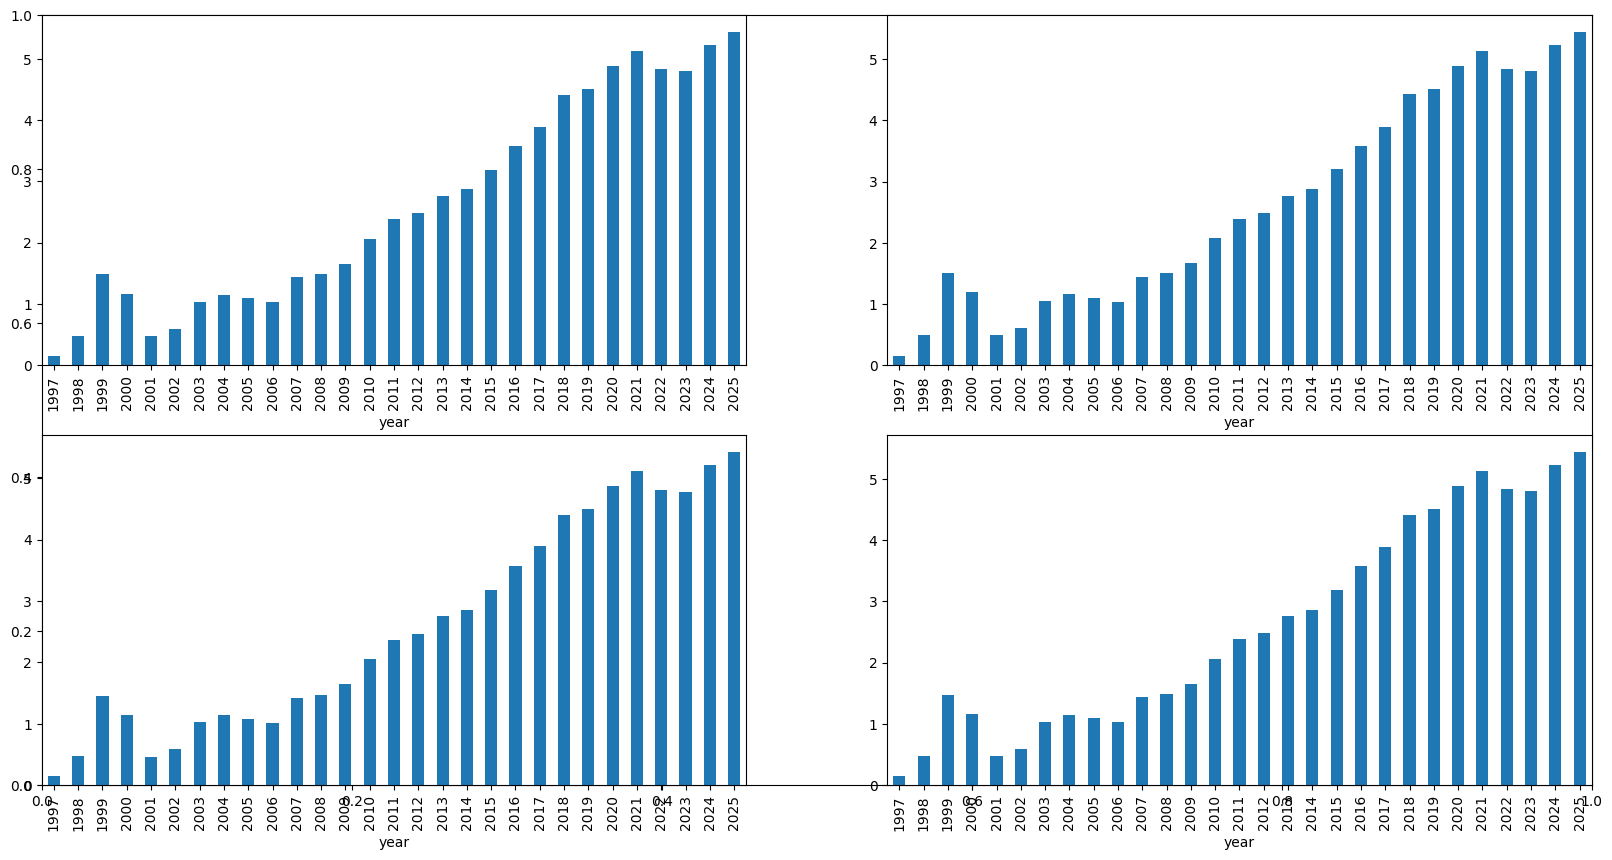

In [37]:
data_grouped = df2.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open_log', 'High_log', 'Low_log', 'Close_log']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [38]:
threshold = 0.001  # or try 0.002
df2['target'] = np.where((df2['Close_log'].shift(-1) - df2['Close_log']) > threshold, 1, 0)

#df2['target'] = np.where(df2['Close_log'].shift(-1) > df2['Close_log'], 1, 0)
#"Will the price go up tomorrow?" yes=1(buy) no=0(sell)

In [39]:
df2['open_log-close_log']  = df2['Open_log'] - df2['Close_log']
df2['daily_return'] = df2['Close_log'].diff()
df2['volatility_5'] = df2['Close_log'].rolling(5).std()
df2['bollinger_upper'] = df2['Close_log'].rolling(20).mean() + 2 * df2['Close_log'].rolling(20).std()
df2['bollinger_lower'] = df2['Close_log'].rolling(20).mean() - 2 * df2['Close_log'].rolling(20).std()
df2['volume_spike'] = df2['Volume_log'] / df2['Volume_log'].rolling(5).mean()
df2['high_low_diff'] = df2['High_log'] - df2['Low_log']



In [40]:
df2.isnull().sum()

Date                   0
Volume_log             0
Open_log               0
High_log               0
Low_log                0
Close_log              0
day                    0
month                  0
year                   0
target                 0
open_log-close_log     0
daily_return           1
volatility_5           4
bollinger_upper       19
bollinger_lower       19
volume_spike           4
high_low_diff          0
dtype: int64

In [41]:
print("Before:", df2.shape[0])
df2 = df2.dropna().reset_index(drop=True)
print("After:", df2.shape[0])


Before: 6853
After: 6834


**We have added the target feature which is a signal whether to buy or not we will train our model to predict this only.**

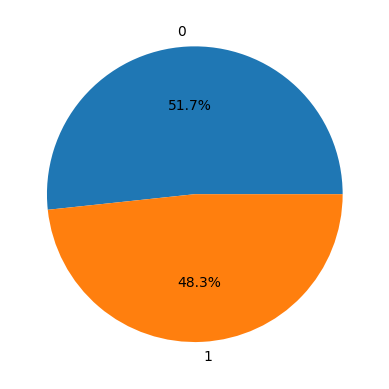

In [42]:
plt.pie(df2['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

checking whether the target is balanced or not, using a pie chart.

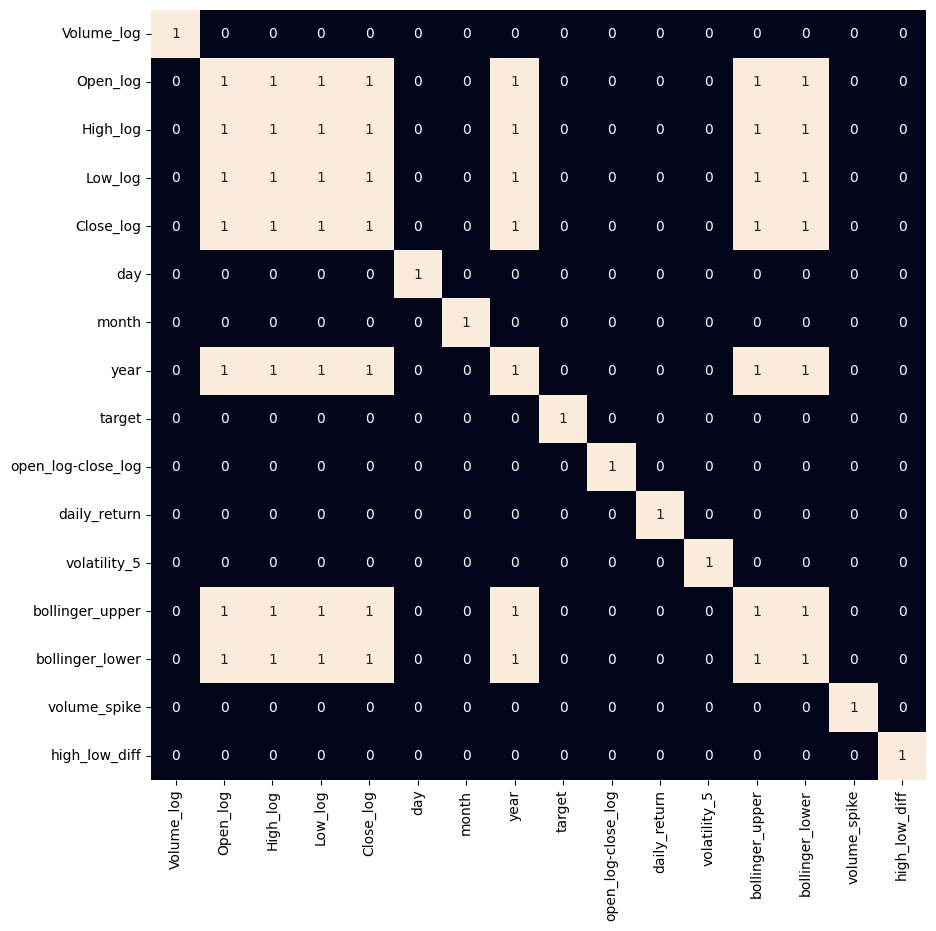

In [43]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sns.heatmap(df2.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

**Data Splitting and Normalization**

In [44]:
features = df2[['open_log-close_log','daily_return','volatility_5','bollinger_upper','bollinger_lower','volume_spike','high_low_diff']]
target = df2['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(6150, 7) (684, 7)


**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,Y_train)


LogisticRegression(max_iter=10000)

In [46]:
from sklearn.metrics import log_loss

y_valid_proba = log_model.predict_proba(X_valid)[:, 1]
log_loss_val = log_loss(Y_valid, y_valid_proba)
print("Logistic Regression Log Loss:", log_loss_val)


Logistic Regression Log Loss: 0.6918598948620791


In [47]:
from sklearn.metrics import roc_auc_score

print("Logistic Regression ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))


Logistic Regression ROC AUC: 0.5288065843621399


logistic regression model is currently not effective in distinguishing between profitable and non-profitable trades.

**Support Vector Classifier (SVC)**

In [48]:
from sklearn.svm import SVC

svc_model = SVC(kernel='poly', probability=True)  # poly or rbf
svc_model.fit(X_train, Y_train)


SVC(kernel='poly', probability=True)

In [49]:
y_valid_proba = svc_model.predict_proba(X_valid)[:, 1]
print("SVC Log Loss:", log_loss(Y_valid, y_valid_proba))
print("SVC ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))


SVC Log Loss: 0.6918425698814762
SVC ROC AUC: 0.5112139917695473


In [50]:
df2['target'].value_counts(normalize=True)
#checking balance

target
0    0.516828
1    0.483172
Name: proportion, dtype: float64

In [51]:
df2.corr()['target'].sort_values(ascending=False)
#checking corr 

target                1.000000
open_log-close_log    0.026310
year                  0.024926
Date                  0.024862
bollinger_lower       0.023381
bollinger_upper       0.023360
Open_log              0.022444
High_log              0.022419
Low_log               0.022327
Close_log             0.022147
volume_spike          0.006324
high_low_diff         0.005919
month                -0.001205
Volume_log           -0.001354
volatility_5         -0.004281
day                  -0.010472
daily_return         -0.021871
Name: target, dtype: float64

the target value is poorly corr with the features


In [52]:
import numpy as np
import pandas as pd

# --- 1. Lagged features: previous day returns, volumes, prices ---
df2['Close_log_lag1'] = df2['Close_log'].shift(1)
df2['Volume_log_lag1'] = df2['Volume_log'].shift(1)
df2['daily_return_lag1'] = df2['daily_return'].shift(1)

# --- 2. RSI (Relative Strength Index) ---
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df2['RSI_14'] = compute_rsi(df2['Close_log'])

# --- 3. MACD (Moving Average Convergence Divergence) ---
exp1 = df2['Close_log'].ewm(span=12, adjust=False).mean()
exp2 = df2['Close_log'].ewm(span=26, adjust=False).mean()
df2['MACD'] = exp1 - exp2
df2['MACD_signal'] = df2['MACD'].ewm(span=9, adjust=False).mean()

# --- 4. Momentum ---
df2['Momentum_10'] = df2['Close_log'] - df2['Close_log'].shift(10)

# --- 5. Average True Range (ATR) ---
high = df2['High_log']
low = df2['Low_log']
close = df2['Close_log']

df2['tr1'] = high - low
df2['tr2'] = (high - close.shift()).abs()
df2['tr3'] = (low - close.shift()).abs()

df2['TR'] = df2[['tr1', 'tr2', 'tr3']].max(axis=1)
df2['ATR_14'] = df2['TR'].rolling(window=14).mean()

# Drop intermediate TR columns to clean up
df2.drop(columns=['tr1', 'tr2', 'tr3', 'TR'], inplace=True)

# --- 6. Rolling statistics (mean and std) of Close and Volume over 5 days ---
df2['Rolling_Mean_Close_5'] = df2['Close_log'].rolling(window=5).mean()
df2['Rolling_Std_Close_5'] = df2['Close_log'].rolling(window=5).std()

df2['Rolling_Mean_Volume_5'] = df2['Volume_log'].rolling(window=5).mean()
df2['Rolling_Std_Volume_5'] = df2['Volume_log'].rolling(window=5).std()

# --- 7. Seasonality: Sine and Cosine transforms of day and month ---
df2['sin_day'] = np.sin(2 * np.pi * df2['day'] / 31)
df2['cos_day'] = np.cos(2 * np.pi * df2['day'] / 31)

df2['sin_month'] = np.sin(2 * np.pi * df2['month'] / 12)
df2['cos_month'] = np.cos(2 * np.pi * df2['month'] / 12)

# --- Finally, handle any NaN values created by rolling or shifting ---
df2 = df2.dropna().reset_index(drop=True)


In [53]:
df2.corr()['target'].sort_values(ascending=False)
#checking corr

target                   1.000000
open_log-close_log       0.026490
year                     0.024113
Date                     0.024045
bollinger_lower          0.022674
bollinger_upper          0.022613
Rolling_Mean_Close_5     0.022031
Close_log_lag1           0.021740
Open_log                 0.021713
High_log                 0.021683
Low_log                  0.021599
Close_log                0.021413
sin_day                  0.009417
volume_spike             0.006600
high_low_diff            0.005158
cos_day                 -0.001350
month                   -0.001426
Volume_log              -0.002128
volatility_5            -0.004911
Rolling_Std_Close_5     -0.004911
sin_month               -0.005709
Rolling_Mean_Volume_5   -0.005861
ATR_14                  -0.007893
day                     -0.009102
Volume_log_lag1         -0.012231
cos_month               -0.016587
Rolling_Std_Volume_5    -0.019156
daily_return            -0.021961
Momentum_10             -0.024718
MACD_signal   

In [54]:
# Existing features you had
base_features = [
    'open_log-close_log',
    'daily_return',
    'volatility_5',
    'bollinger_upper',
    'bollinger_lower',
    'volume_spike',
    'high_low_diff'
]

# New features from feature engineering
new_features = [
    'RSI_14',
    'MACD',
    'MACD_signal',
    'Momentum_10',
    'ATR_14',
    'Rolling_Mean_Close_5',
    'Rolling_Std_Close_5',
    'Rolling_Mean_Volume_5',
    'Rolling_Std_Volume_5',
    'sin_day',
    'cos_day',
    'sin_month',
    'cos_month'
]

# Combine all features
all_features = base_features + new_features

# Select features and target
features = df2[all_features]
target = df2['target']

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features_scaled, target, test_size=0.1, random_state=2022)

print(X_train.shape, X_valid.shape)


(6138, 20) (682, 20)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, Y_train)

# Predict probabilities on train and validation sets
y_train_proba = logreg.predict_proba(X_train)[:, 1]
y_valid_proba = logreg.predict_proba(X_valid)[:, 1]

# Evaluate performance
train_log_loss = metrics.log_loss(Y_train, y_train_proba)
valid_log_loss = metrics.log_loss(Y_valid, y_valid_proba)

train_roc_auc = metrics.roc_auc_score(Y_train, y_train_proba)
valid_roc_auc = metrics.roc_auc_score(Y_valid, y_valid_proba)

print(f"Logistic Regression Log Loss - Train: {train_log_loss:.4f}, Validation: {valid_log_loss:.4f}")
print(f"Logistic Regression ROC AUC - Train: {train_roc_auc:.4f}, Validation: {valid_roc_auc:.4f}")

import joblib
# Save model and scaler
joblib.dump(logreg, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

Logistic Regression Log Loss - Train: 0.6908, Validation: 0.6897
Logistic Regression ROC AUC - Train: 0.5356, Validation: 0.5503


['scaler.pkl']

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(features_scaled)


In [57]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)

# Split PCA-reduced data
X2_train, X2_test, y2_train, y2_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Predict on test set
y2_pred = model.predict(X2_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y2_test, y2_pred)
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='binary')  # or 'macro'/'micro' for multi-class
recall = recall_score(y2_test, y2_pred, average='binary')
f1 = f1_score(y2_test, y2_pred, average='binary')

# Output results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))


Confusion Matrix:
 [[530 199]
 [450 185]]
Accuracy: 0.5241935483870968
Precision: 0.4817708333333333
Recall: 0.29133858267716534
F1 Score: 0.3631010794896958

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.73      0.62       729
           1       0.48      0.29      0.36       635

    accuracy                           0.52      1364
   macro avg       0.51      0.51      0.49      1364
weighted avg       0.51      0.52      0.50      1364



In [58]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [59]:
y_valid_proba = xgb_model.predict_proba(X_valid)[:, 1]
print("XGBoost Log Loss:", log_loss(Y_valid, y_valid_proba))
print("XGBoost ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))


XGBoost Log Loss: 0.8074490775640205
XGBoost ROC AUC: 0.5039119045977803


In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_search = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/aarthipds/pythonbesent/data science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aarthipds/pythonbesent/data science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aarthipds/pythonbesent/data science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aarthipds/pythonbesent/data science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best ROC AUC: 0.5175929551577451


In [61]:
xgb = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=2022
)

xgb.fit(X_train, Y_train)

y_valid_proba = xgb.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(Y_valid, y_valid_proba)
print(f'XGBoost ROC AUC: {roc_auc:.4f}')


XGBoost ROC AUC: 0.5171


**Randomforest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss

# Initialize model
rf = RandomForestClassifier(random_state=2022, n_estimators=100)

# Train model
rf.fit(X_train, Y_train)

# Predict probabilities
y_train_proba = rf.predict_proba(X_train)[:, 1]
y_valid_proba = rf.predict_proba(X_valid)[:, 1]

# Calculate metrics
train_log_loss = log_loss(Y_train, y_train_proba)
valid_log_loss = log_loss(Y_valid, y_valid_proba)
train_roc_auc = roc_auc_score(Y_train, y_train_proba)
valid_roc_auc = roc_auc_score(Y_valid, y_valid_proba)

print(f"Random Forest Log Loss - Train: {train_log_loss:.4f}, Validation: {valid_log_loss:.4f}")
print(f"Random Forest ROC AUC - Train: {train_roc_auc:.4f}, Validation: {valid_roc_auc:.4f}")


Random Forest Log Loss - Train: 0.2049, Validation: 0.7117
Random Forest ROC AUC - Train: 1.0000, Validation: 0.5072


In [63]:
rf = RandomForestClassifier(
    random_state=2022,
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    max_features='sqrt'
)

rf.fit(X_train, Y_train)

y_train_proba = rf.predict_proba(X_train)[:, 1]
y_valid_proba = rf.predict_proba(X_valid)[:, 1]

print("Train ROC AUC:", roc_auc_score(Y_train, y_train_proba))
print("Valid ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))


Train ROC AUC: 0.9467893882523162
Valid ROC AUC: 0.5019731853587923


In [64]:
'''
rf = RandomForestClassifier(
    random_state=2022,
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=10,
    max_features='log2'
)

rf.fit(X_train, Y_train)

y_train_proba = rf.predict_proba(X_train)[:, 1]
y_valid_proba = rf.predict_proba(X_valid)[:, 1]

print("Train ROC AUC:", roc_auc_score(Y_train, y_train_proba))
print("Valid ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))
'''

'\nrf = RandomForestClassifier(\n    random_state=2022,\n    n_estimators=100,\n    max_depth=5,\n    min_samples_leaf=10,\n    max_features=\'log2\'\n)\n\nrf.fit(X_train, Y_train)\n\ny_train_proba = rf.predict_proba(X_train)[:, 1]\ny_valid_proba = rf.predict_proba(X_valid)[:, 1]\n\nprint("Train ROC AUC:", roc_auc_score(Y_train, y_train_proba))\nprint("Valid ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))\n'

In [65]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, log_loss
import numpy as np


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # Number of combinations to try
    scoring='roc_auc',        # Evaluation metric
    cv=3,                     # 3-fold cross-validation
    verbose=2,                # Display progress
    random_state=42,
    n_jobs=-1                 # Use all cores
)

random_search.fit(X_train, Y_train)


print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC on training (CV):", random_search.best_score_)

# Evaluate on validation set
best_rf = random_search.best_estimator_
y_valid_proba = best_rf.predict_proba(X_valid)[:, 1]

print("Validation ROC AUC:", roc_auc_score(Y_valid, y_valid_proba))
print("Validation Log Loss:", log_loss(Y_valid, y_valid_proba))
'''


'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import roc_auc_score, log_loss\nimport numpy as np\n\n\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [None, 10, 20, 30, 40],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'bootstrap\': [True, False]\n}\n\n\nrf = RandomForestClassifier(random_state=42)\n\nrandom_search = RandomizedSearchCV(\n    estimator=rf,\n    param_distributions=param_dist,\n    n_iter=50,                # Number of combinations to try\n    scoring=\'roc_auc\',        # Evaluation metric\n    cv=3,                     # 3-fold cross-validation\n    verbose=2,                # Display progress\n    random_state=42,\n    n_jobs=-1                 # Use all cores\n)\n\nrandom_search.fit(X_train, Y_train)\n\n\nprint("Best Parameters:", random_search.best_par

In [66]:
a = df2[
    [
        'open_log-close_log',
        'daily_return',
        'volatility_5',
        'bollinger_upper',
        'bollinger_lower',
        'volume_spike',
        'high_low_diff',
        'RSI_14',
        'MACD',
        'MACD_signal',
        'Momentum_10',
        'ATR_14',
        'Rolling_Mean_Close_5',
        'Rolling_Std_Close_5',
        'Rolling_Mean_Volume_5',
        'Rolling_Std_Volume_5',
        'sin_day',
        'cos_day',
        'sin_month',
        'cos_month',
        'target'
    ]
]

print(a)


      open_log-close_log  daily_return  volatility_5  bollinger_upper  \
0              -0.000934      0.000934      0.013833         0.103545   
1              -0.010209      0.010675      0.011868         0.111727   
2               0.010228     -0.012077      0.008963         0.115486   
3               0.008435     -0.007034      0.006855         0.117521   
4              -0.013555      0.013555      0.007180         0.121856   
...                  ...           ...           ...              ...   
6815            0.002261     -0.007331      0.009016         5.494910   
6816            0.009487     -0.008878      0.009810         5.494424   
6817           -0.004888     -0.000088      0.007006         5.495963   
6818            0.008451     -0.016611      0.012315         5.499049   
6819            0.030329     -0.028544      0.021445         5.505974   

      bollinger_lower  volume_spike  high_low_diff     RSI_14      MACD  \
0            0.055948      0.997159       0.0051

In [67]:
print(a['Momentum_10'])

0       0.037561
1       0.047752
2       0.035675
3       0.029611
4       0.040745
          ...   
6815   -0.038437
6816   -0.046224
6817   -0.065587
6818   -0.057667
6819   -0.097364
Name: Momentum_10, Length: 6820, dtype: float64


In [68]:
'''
# 📘 Full Working Pipeline After EDA

# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data (Assume EDA and preprocessing completed before this)
df = pd.read_csv('AMZN_stock_data.csv')  # Adjust file name if needed

# 3. Handle Missing Values
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)

# 4. Class Distribution
print("Target Distribution:\n", df['target'].value_counts(normalize=True))
sns.countplot(df['target'])
plt.title("Before SMOTE")
plt.show()

# 5. Feature & Target Split
X = df.drop(columns=['target'])
y = df['target']

# 6. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Feature Selection (Top 15 features)
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features.tolist())

# 8. Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 9. Show Distribution After SMOTE
sns.countplot(y_resampled)
plt.title("After SMOTE")
plt.show()

# 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# 11. Logistic Regression + Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# 12. Predictions and Evaluation (Logistic Regression)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

print("\nLogistic Regression Performance")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 13. ROC Curve (Logistic Regression)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'LogReg ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# 14. Feature Importance (Logistic Coefficients)
coeff_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': best_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Influential Features (Logistic Regression):\n", coeff_df)

# 15. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[selected_features.tolist() + ['target']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 16. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Performance")
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# 17. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Performance")
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
'''


'\n# 📘 Full Working Pipeline After EDA\n\n# 1. Import Required Libraries\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score\nfrom sklearn.feature_selection import SelectKBest, f_classif\nfrom imblearn.over_sampling import SMOTE\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n# 2. Load Data (Assume EDA and preprocessing completed before this)\ndf = pd.read_csv(\'AMZN_stock_data.csv\')  # Adjust file name if needed\n\n# 3. Handle Missing Values\nif df.isnull().sum().sum() > 0:\n    df.dropna(inplace=True)\n\n# 4. Class Distri